In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet2

In [2]:
# Import CSV File

file_path="Test/Test.csv"

data = pd.read_csv(file_path,header=13)


In [3]:
# Extract data
t = data['TIME'].values
Vgs = data['Vgs'].values
Vds = data['Vds'].values
Id = data['Id'].values

Text(0.5, 0, 'Time (s)')

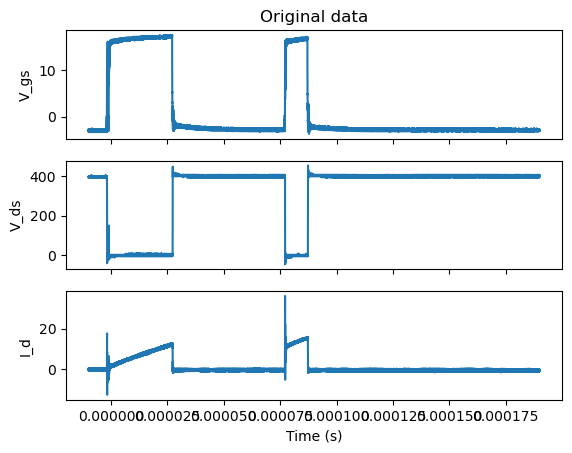

In [4]:
# Plot original data
fig, axes = plt.subplots(3, 1, sharex=True)
axes[0].plot(t, Vgs)
axes[0].set_ylabel("V_gs")
axes[0].set_title("Original data")

axes[1].plot(t, Vds)
axes[1].set_ylabel("V_ds")

axes[2].plot(t, Id)
axes[2].set_ylabel("I_d")
plt.xlabel('Time (s)')

In [15]:
# Perform continuous wavelet transform

fs = len(t) / (t[-1] - t[0])
widths = np.arange(1, 31)
cwt_Id = cwt(Id, morlet2, widths, s=fs)
cwt_Vds = cwt(Vds, morlet2, widths,  s=fs)
cwt_Vgs = cwt(Vgs, morlet2, widths,  s=fs)

cwt_Id


In [16]:
# Reconstruct the data
Id_recon = np.sum(cwt_Id, axis=0)

c:\Users\jm538\anaconda3\envs\Wavelet\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Time (s)')

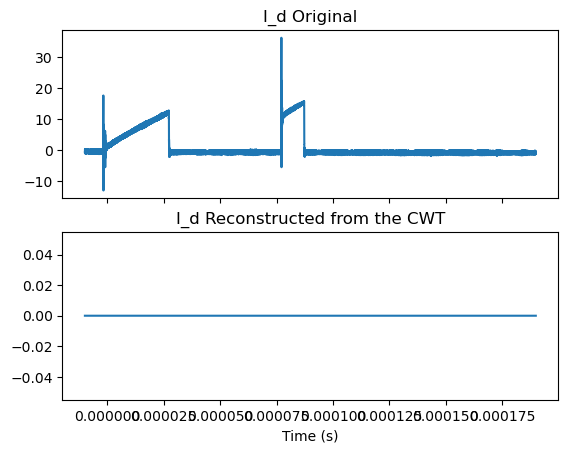

In [17]:
# Plot original and reconstructed data
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, Id)
axes[0].set_title("I_d Original")

axes[1].plot(t, Id_recon)
axes[1].set_title("I_d Reconstructed from the CWT")
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

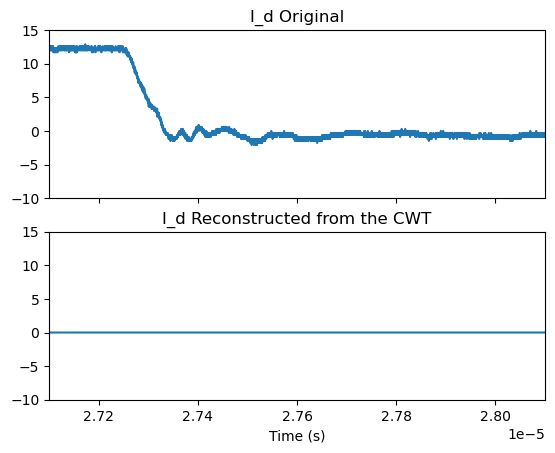

In [18]:
# Plot zoomed-in view of original and reconstructed data
t_limit = 27.6e-6 + 0.5 * np.array([-1e-6, 1e-6])

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, Id)
axes[0].set_xlim(t_limit)
axes[0].set_ylim([-10, 15])
axes[0].set_title("I_d Original")

axes[1].plot(t, Id_recon)
axes[1].set_xlim(t_limit)
axes[1].set_ylim([-10, 15])
axes[1].set_title("I_d Reconstructed from the CWT")
plt.xlabel('Time (s)')

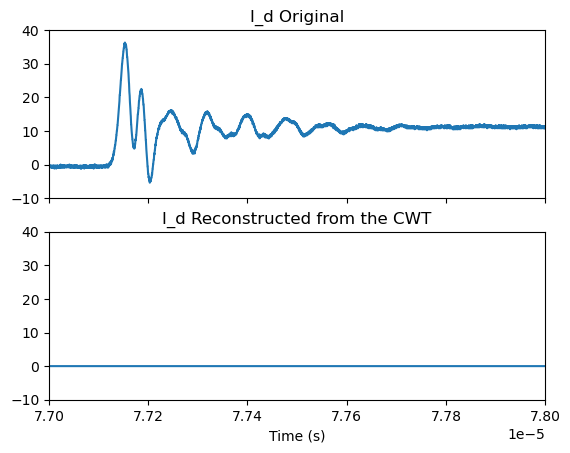

In [19]:
# Plot another zoomed-in view of original and reconstructed data
t_limit = 77.5e-6 + 0.5 * np.array([-1e-6, 1e-6])

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, Id)
axes[0].set_xlim(t_limit)
axes[0].set_ylim([-10, 40])
axes[0].set_title("I_d Original")

axes[1].plot(t, Id_recon)
axes[1].set_xlim(t_limit)
axes[1].set_ylim([-10, 40])
axes[1].set_title("I_d Reconstructed from the CWT")
plt.xlabel('Time (s)')

plt.show()

In [21]:
### plot function

def plot_wavelet(t, t_limit, y, cfs, f):
    fig, axes = plt.subplots(3, 1, sharex=True)

    axes[0].plot(t, y)
    axes[0].set_title("Original Data")
    axes[0].set_xlim(t_limit)

    extent = [t[0], t[-1], f[0], f[-1]]
    im1 = axes[1].imshow(np.abs(cfs), aspect='auto', origin='lower', cmap='jet', extent=extent)
    axes[1].set_title("CWT abs")
    axes[1].set_xlim(t_limit)

    im2 = axes[2].imshow(np.angle(cfs), aspect='auto', origin='lower', cmap='jet', extent=extent)
    axes[2].set_title("CWT angle")
    axes[2].set_xlim(t_limit)

    plt.show()

In [22]:
plot_wavelet(t,t_limit,Id_recon, ,fs)

TypeError: plot_wavelet() missing 1 required positional argument: 'f'